# Решение антагонистической матричной игры

In [5]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline

def nash_equilibrium(a):
    A = a.transpose()
    rownum, colnum = np.shape(A)
    #создаем вектор c1 целевой функции для ЗЛП, соответсвующей первому игроку
    c1 = np.array([1] * colnum)
    #создаем вектор c2 правой части для ЗЛП, соответствующей первому игроку
    c2 = np.array([-1] * rownum)
    #приводим матрицу а к виду, подходящему для использования ф-ии linprog для нахождения стратегий игрока 1
    min_a = np.amin(A)
    if (min_a < 0):
        A -= min_a - 1
    A *= -1
    p = linprog(c1, A, c2).x
    v = np.dot(p, c1)
    p_opt = p * (1 / v)
    value = 1 / v
    if (min_a < 0):
        value += min_a - 1
    #приводим матрицу а к виду, подходящему для использования ф-ии linprog для нахождения стратегий игрока 2
    A *= -1
    #создаем вектор b1 целевой функции для ЗЛП, соответсвующей второму игроку
    b1 = np.array([-1] * rownum)
    #создаем вектор b2 правой части для ЗЛП, соответсвующей второму игроку
    b2 = np.array([1] * colnum)
    q = linprog(b1, a, b2).x
    q_opt = q * ( 1 / v)
    return value, p_opt, q_opt

def draw(p,q):
    plt.xlim([0, len(p)+1])
    plt.ylim([0, np.max(p)+1])
    for i in range(len(p)):
        plt.plot([i+1, i+1], [0, p[i]])
        plt.scatter(i+1, p[i])
    plt.show()

    plt.xlim([0, len(q)+1])
    plt.ylim([0, np.max(q)+1])
    for i in range(len(q)):
        plt.plot([i+1, i+1], [0, q[i]])
        plt.scatter(i+1, q[i])
    plt.show()

# 1. Cпектр оптимальной стратегии состоит из одной точки

решение игры: 0.0
оптимальная стратегия 1 игрока [0.5 0.5]
оптимальная стратегия 2 игрока [0.5 0.5]


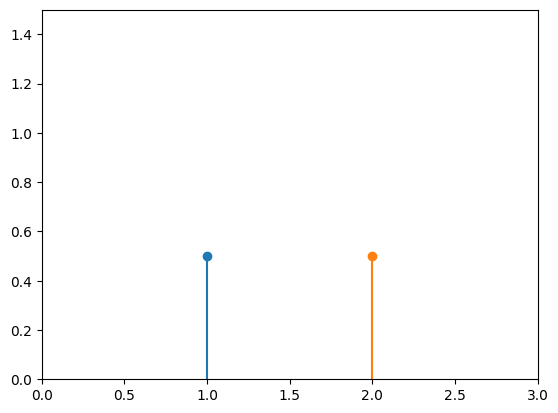

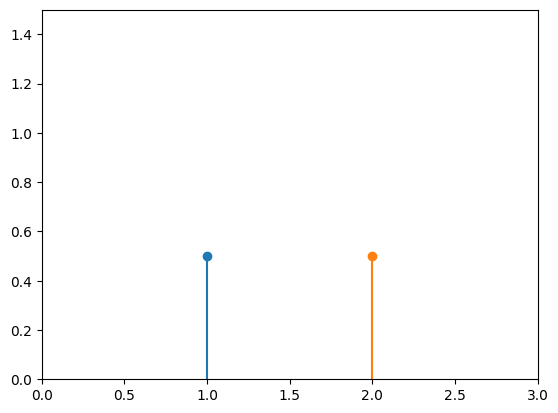

In [6]:
A = np.array([[-1, 1],
              [1, -1]])
v,p,q = nash_equilibrium(A)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

# 2. Cпектр оптимальной стратегии неполон

решение игры: 4.625
оптимальная стратегия 1 игрока [0.0625 0.     0.25   0.6875]
оптимальная стратегия 2 игрока [0.125  0.1875 0.6875]


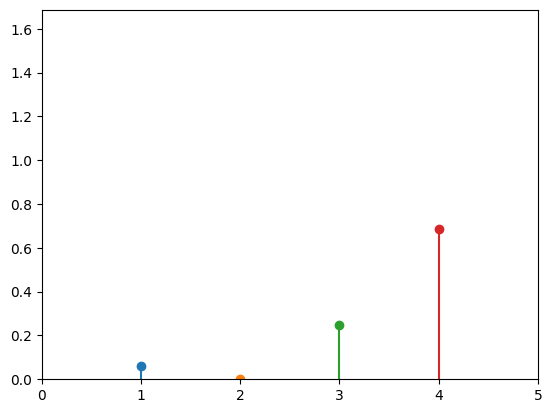

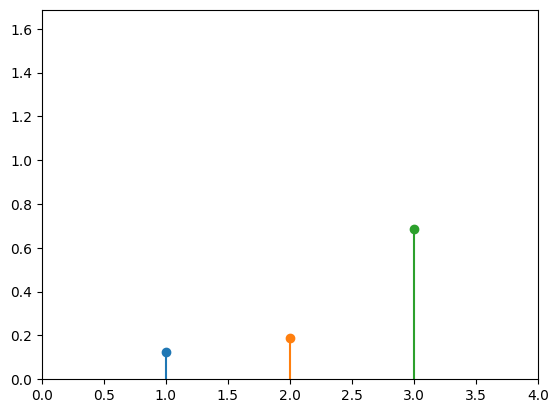

In [7]:
A = np.array([[4, 0, 6],
              [3, 8, 4],
              [1, 2, 6],
              [6, 6, 4]])
v,p,q = nash_equilibrium(A)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

# 3. Cпектр оптимальной стратегии полон

решение игры: 2.5
оптимальная стратегия 1 игрока [0.25 0.25 0.5 ]
оптимальная стратегия 2 игрока [0.25 0.5  0.25]


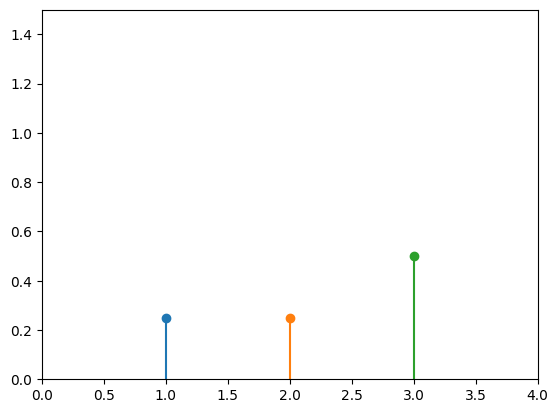

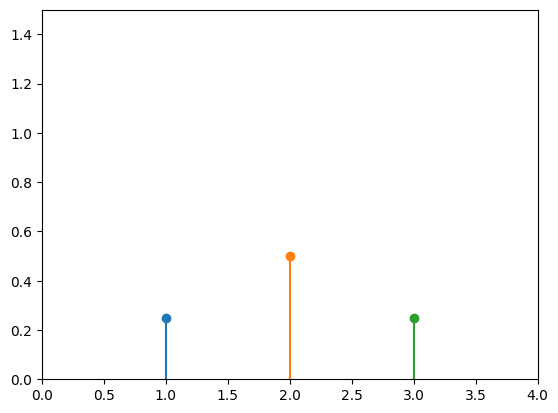

In [8]:
A = np.array([[3, 1, 5],
              [1, 3, 3],
              [3, 3, 1]])
v,p,q = nash_equilibrium(A)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

решение игры: 0.29411764705882426
оптимальная стратегия 1 игрока [0.88235294 0.11764706]
оптимальная стратегия 2 игрока [0.35294118 0.64705882]


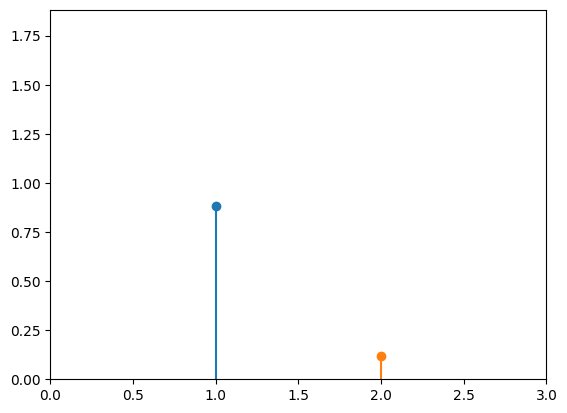

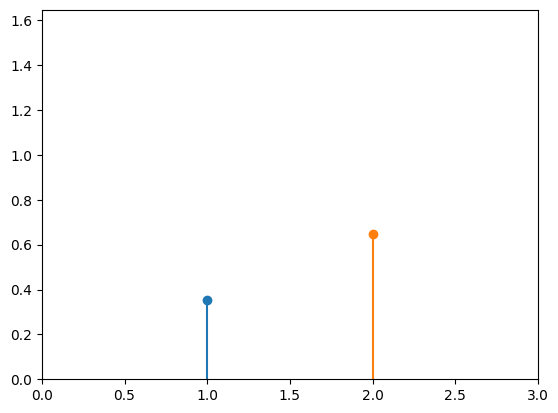

In [10]:
A = np.array([[-1, 1],
              [10, -5]])
v,p,q = nash_equilibrium(A)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

решение игры: -3.0
оптимальная стратегия 1 игрока [0. 1.]
оптимальная стратегия 2 игрока [0. 1. 0.]


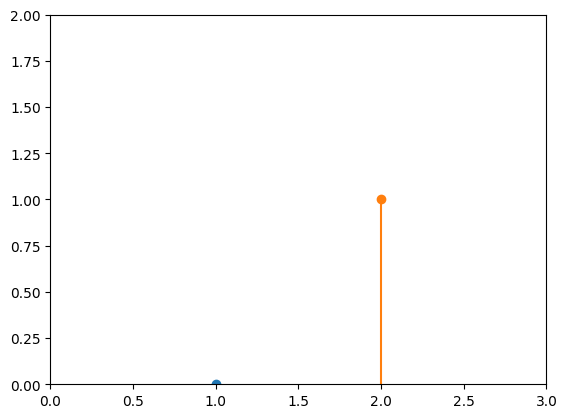

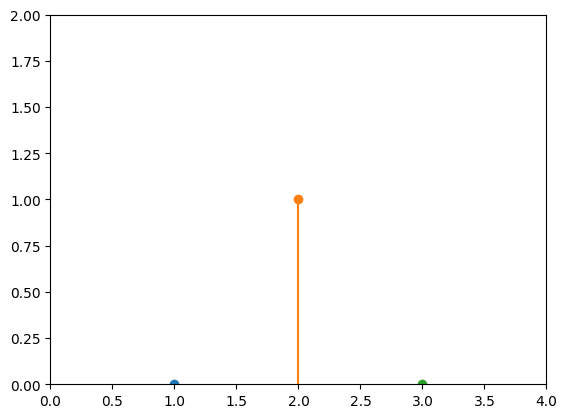

In [11]:
A = np.array([[0, -3, -3],
              [-3, -3, -3]])
v,p,q = nash_equilibrium(A)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)